In [33]:
import json
import requests
import pandas as pd

In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
# set the default plot size
pylab.rcParams['figure.figsize'] = (12, 6)

In [4]:
# get the information for all player propects
r = requests.get("http://m.mlb.com/gen/players/prospects/2018/playerProspects.json")

In [8]:
# load the response into a dict
prospects = json.loads(r.text)

In [12]:
# inspect the prospects dict
prospects.keys()

dict_keys(['last_updated', 'year', 'prospect_players'])

In [11]:
# inspect the prospects
print("Last Updated: {}".format(prospects['last_updated']))
print("Year: {}".format(prospects['year']))

Last Updated: 2018-03-11T16:28:18.753Z
Year: 2018


In [28]:
# look at the keys in prospect_players
prospects['prospect_players'].keys()

dict_keys(['cin', '1b', 'lhp', 'mia', 'chc', 'cws', 'tex', 'bos', 'nym', 'tor', 'rhp', 'min', 'ana', 'ss', 'mil', 'sea', 'prospects', 'cle', 'oak', 'c', 'draft', 'tb', 'phi', 'stl', '2b', '3b', 'atl', 'hou', 'of', 'la', 'sf', 'bal', 'nyy', 'kc', 'was', 'pit', 'det', 'col', 'sd', 'ari'])


In [30]:
# look at the keys for the first player of a team
prospects['prospect_players']['bos'][0]

{'photo180x218': '/assets/images/7/5/8/264702758/cuts/180x218/cut.jpg',
 'photo360x436': '/assets/images/7/5/8/264702758/cuts/360x436/cut.jpg',
 'player_first_name': 'Michael',
 'player_id': 656308,
 'player_last_name': 'Chavis',
 'position': '3B',
 'preseason100': '',
 'preseason20': 1,
 'prospect_year': '2018',
 'rank': 1,
 'team_file_code': 'BOS',
 'thumb': '/assets/images/7/5/8/264702758/cuts/74x74/cut.jpg',
 'thumb124x150': '/assets/images/7/5/8/264702758/cuts/124x150/cut.jpg',
 'thumb62x75': '/assets/images/7/5/8/264702758/cuts/62x75/cut.jpg'}

In [26]:
# iterate over prospects players and pull out data
players = []
for team in prospects['prospect_players']:
    players.extend(prospects['prospect_players'][team])

In [27]:
# count how many players there are
len(players)

1130

In [31]:
# look at one player
players[0]

{'photo180x218': '/assets/images/3/9/8/263967398/cuts/180x218/cut.jpg',
 'photo360x436': '/assets/images/3/9/8/263967398/cuts/360x436/cut.jpg',
 'player_first_name': 'Nick',
 'player_id': 669222,
 'player_last_name': 'Senzel',
 'position': '3B',
 'preseason100': 7,
 'preseason20': 1,
 'prospect_year': '2018',
 'rank': 1,
 'team_file_code': 'CIN',
 'thumb': '/assets/images/3/9/8/263967398/cuts/74x74/cut.jpg',
 'thumb124x150': '/assets/images/3/9/8/263967398/cuts/124x150/cut.jpg',
 'thumb62x75': '/assets/images/3/9/8/263967398/cuts/62x75/cut.jpg'}


In [34]:
# load players into DataFrame
df = pd.DataFrame(players)

In [35]:
# inspect the DataFrame
df.head()

,photo180x218,photo360x436,player_first_name,player_id,player_last_name,position,preseason100,preseason20,prospect_year,rank,team_file_code,thumb,thumb124x150,thumb62x75
0,/assets/images/3/9/8/263967398/cuts/180x218/cu...,/assets/images/3/9/8/263967398/cuts/360x436/cu...,Nick,669222,Senzel,3B,7,1,2018,1,CIN,/assets/images/3/9/8/263967398/cuts/74x74/cut.jpg,/assets/images/3/9/8/263967398/cuts/124x150/cu...,/assets/images/3/9/8/263967398/cuts/62x75/cut.jpg
1,/assets/images/0/3/0/263968030/cuts/180x218/cu...,/assets/images/0/3/0/263968030/cuts/360x436/cu...,Hunter,668881,Greene,RHP,21,2,2018,2,CIN,/assets/images/0/3/0/263968030/cuts/74x74/cut.jpg,/assets/images/0/3/0/263968030/cuts/124x150/cu...,/assets/images/0/3/0/263968030/cuts/62x75/cut.jpg
2,/assets/images/6/1/8/263968618/cuts/180x218/cu...,/assets/images/6/1/8/263968618/cuts/360x436/cu...,Taylor,666211,Trammell,OF,43,3,2018,3,CIN,/assets/images/6/1/8/263968618/cuts/74x74/cut.jpg,/assets/images/6/1/8/263968618/cuts/124x150/cu...,/assets/images/6/1/8/263968618/cuts/62x75/cut.jpg
3,/assets/images/1/5/6/263969156/cuts/180x218/cu...,/assets/images/1/5/6/263969156/cuts/360x436/cu...,Jesse,608385,Winker,OF,82,4,2018,4,CIN,/assets/images/1/5/6/263969156/cuts/74x74/cut.jpg,/assets/images/1/5/6/263969156/cuts/124x150/cu...,/assets/images/1/5/6/263969156/cuts/62x75/cut.jpg
4,/assets/images/8/3/2/263968832/cuts/180x218/cu...,/assets/images/8/3/2/263968832/cuts/360x436/cu...,Tyler,641816,Mahle,RHP,84,5,2018,5,CIN,/assets/images/8/3/2/263968832/cuts/74x74/cut.jpg,/assets/images/8/3/2/263968832/cuts/124x150/cu...,/assets/images/8/3/2/263968832/cuts/62x75/cut.jpg


In [38]:
# define unneeded columns to drop
cols = ['photo180x218', 'photo360x436', 'thumb', 'thumb124x150', 'thumb62x75']

# drop columns
df.drop(cols, axis=1, inplace=True)

In [39]:
# inspect the DataFrame
df.head()

,player_first_name,player_id,player_last_name,position,preseason100,preseason20,prospect_year,rank,team_file_code
0,Nick,669222,Senzel,3B,7,1,2018,1,CIN
1,Hunter,668881,Greene,RHP,21,2,2018,2,CIN
2,Taylor,666211,Trammell,OF,43,3,2018,3,CIN
3,Jesse,608385,Winker,OF,82,4,2018,4,CIN
4,Tyler,641816,Mahle,RHP,84,5,2018,5,CIN


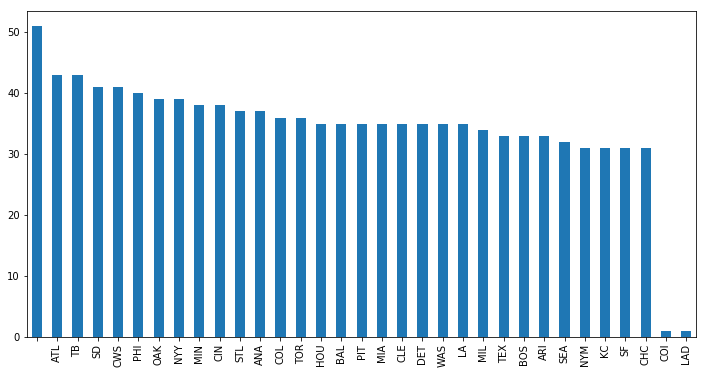

In [45]:
# count the number of players per team
df['team_file_code'].value_counts().plot('bar')

In [46]:
# write players to CSV
df.to_csv('2018_mlb_prospect_players.csv', index=False)